<a href="https://colab.research.google.com/github/HelamaBoeira/data-sience/blob/main/ml_classification_scripts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autor: Helamã da Silva Boeira 30/04/2022

In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#Carrega o dataset com os dados para o treinamento e validacao
dados_cryo_treino = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [4]:
dados_cryo_treino.shape

(90, 7)

In [5]:
dados_cryo_treino.head(10)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0
5,1,41,8,2,2,20,1
6,1,36,11,2,1,8,0
7,1,59,3,3,3,20,0
8,1,20,4,12,1,6,1
9,2,34,11,3,3,150,0


In [6]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(dados_cryo_treino[['Sexo', 'Idade', 'Tempo', 'Numero_Verrugas', "Tipo", "Area"]])
#Definição do atributo de classificacao
data_classif = np.array(dados_cryo_treino['Resultado_Tratamento'])

In [9]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados, size=35):
    corr = dados.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

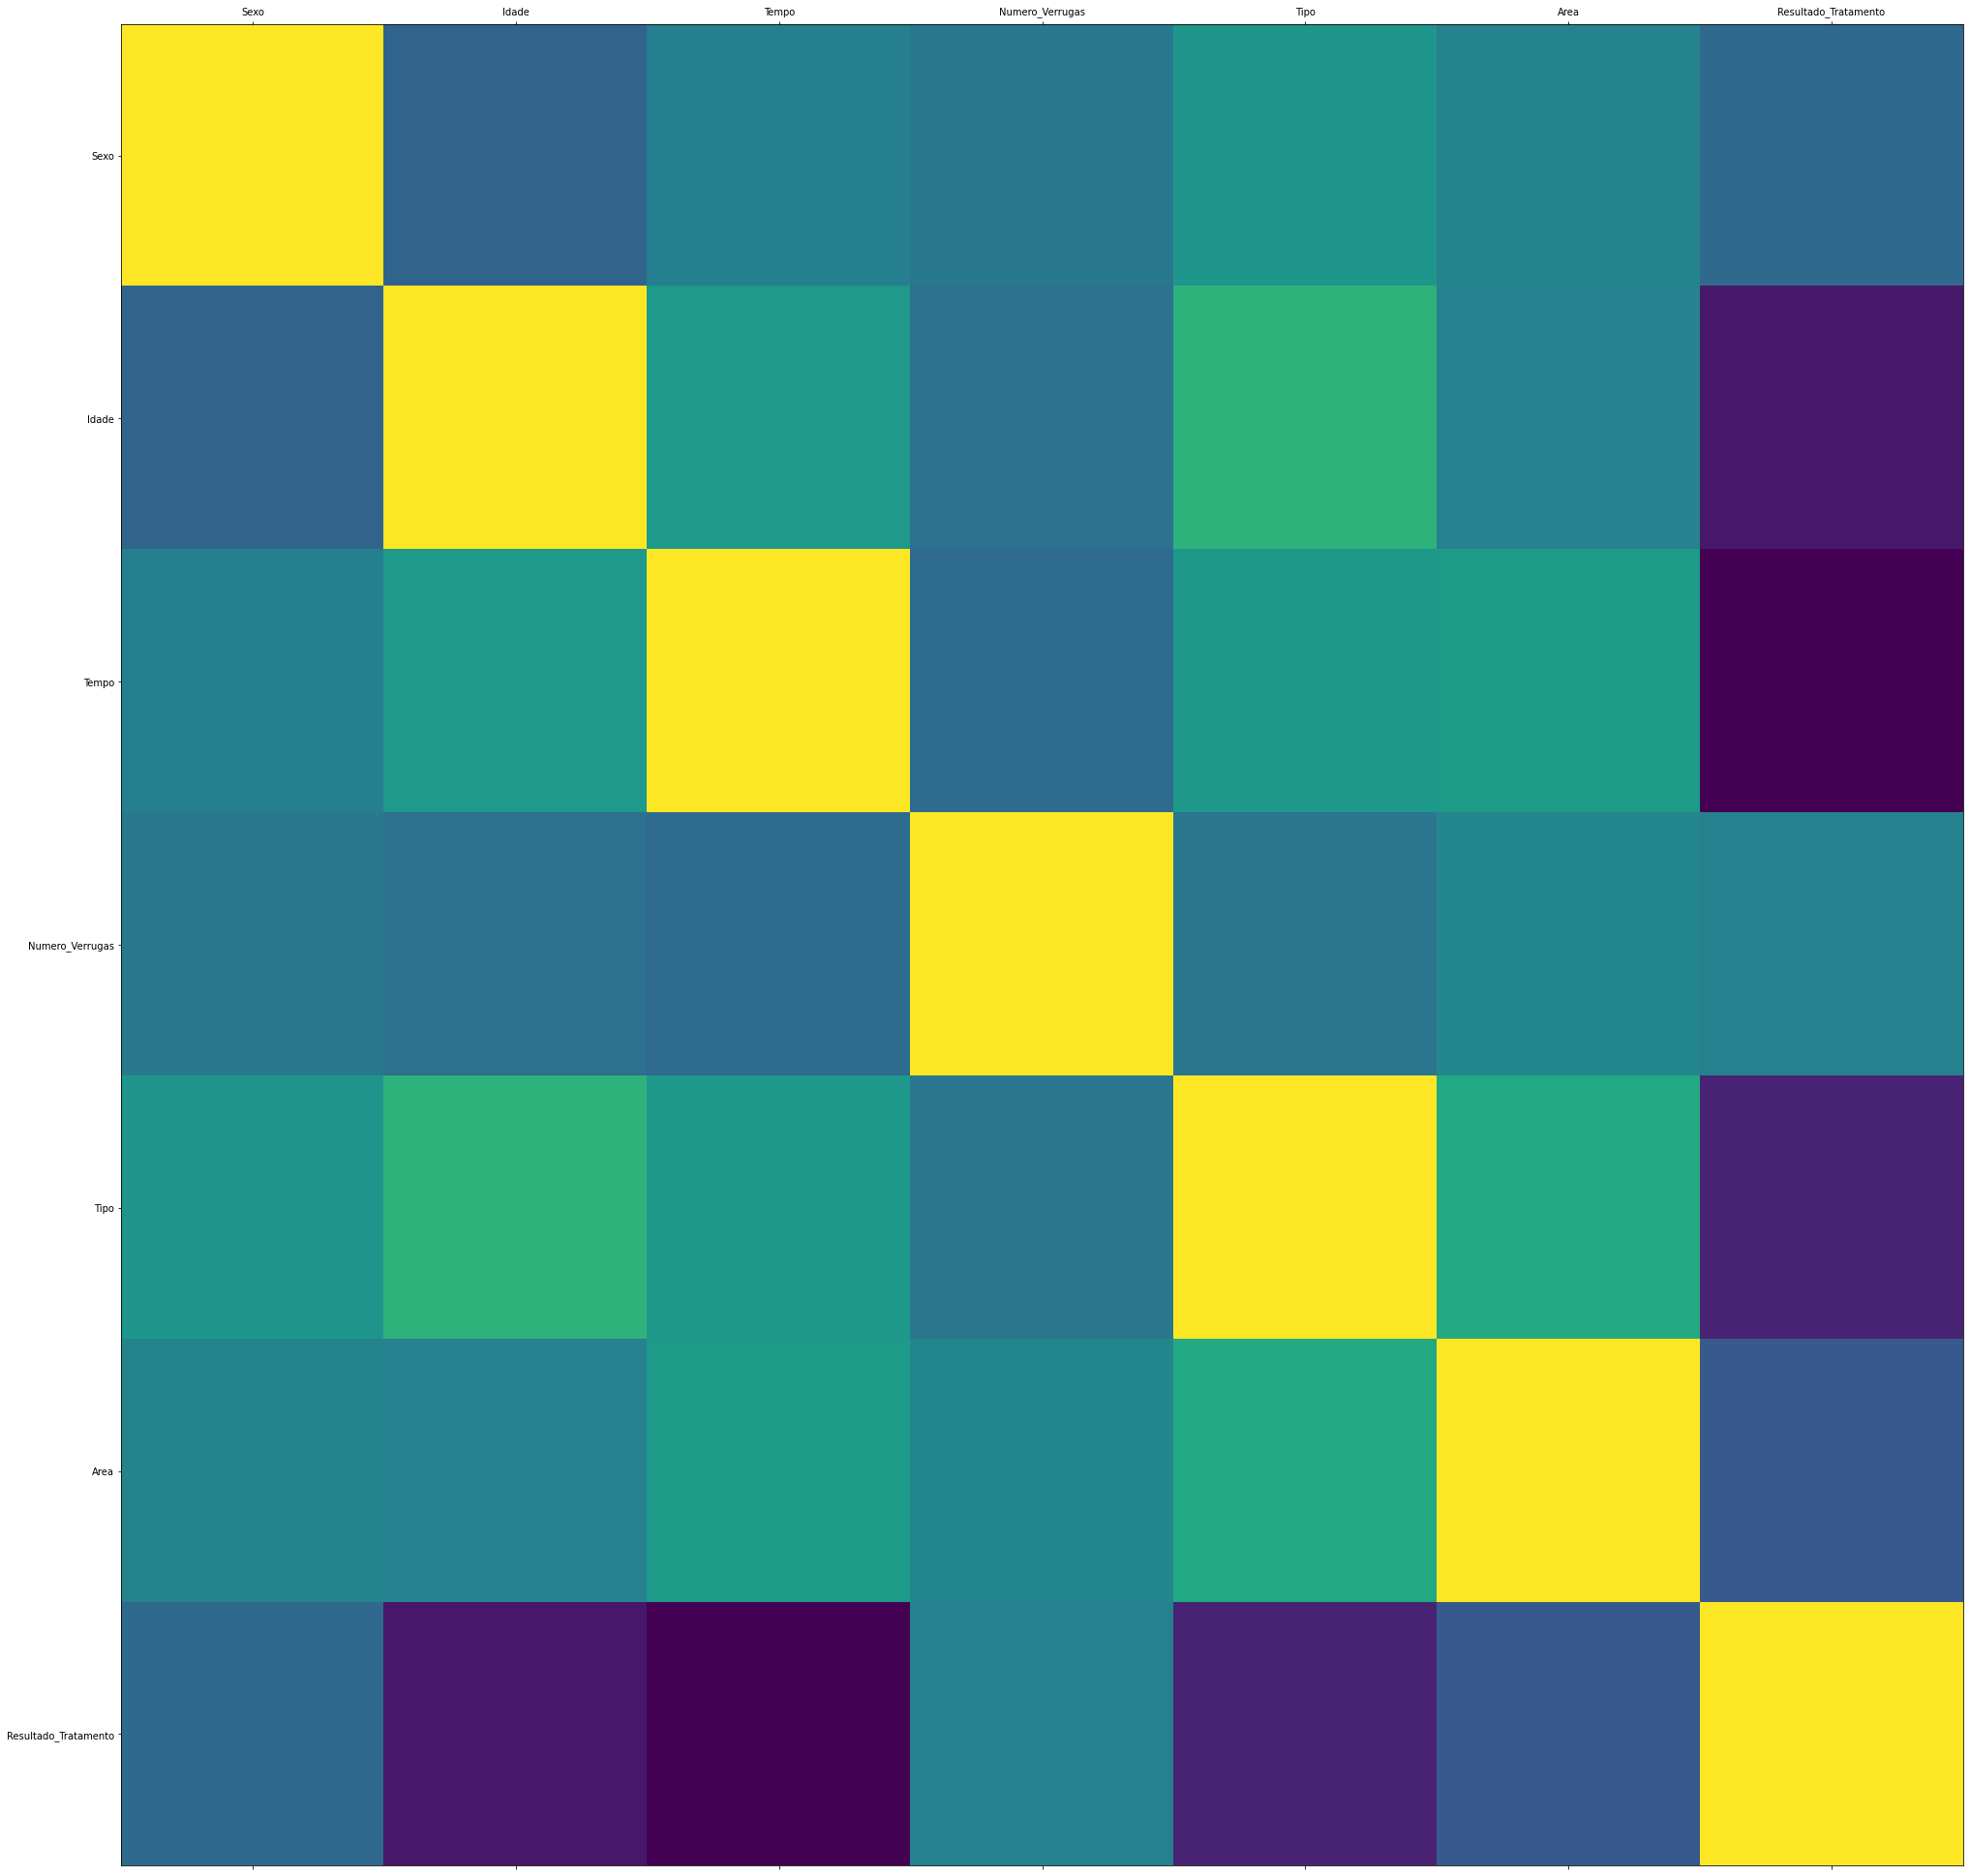

In [10]:
# Criando o gráfico
plot_corr(dados_cryo_treino)

In [14]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [15]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  2  32  12   4   3 750]
 [  2  15   2   3   1   4]
 [  1  29   7   6   1  96]
 [  2  24   9   3   3  20]
 [  2  28   5   9   1 100]
 [  1  28   4   3   1 100]
 [  2  16   8   1   2  60]
 [  2  15   2  10   3  70]
 [  2  17  11   2   1  10]
 [  1  15   2  11   1   4]
 [  1  17   9  12   1  10]
 [  1  17   5   4   1  63]
 [  2  34  12   3   3  95]
 [  1  27  10   7   1   6]
 [  1  40  11   9   2  80]
 [  2  41   7   5   2  20]
 [  2  23   9   5   3  72]
 [  1  30   2   2   1 115]
 [  1  15   3   2   1   4]
 [  1  29   7   5   1  96]
 [  1  35  12   5   1 100]
 [  1  20   3  11   1  75]
 [  1  17   5  10   1  63]
 [  1  24   9   8   1  20]
 [  2  28   4  11   1 100]
 [  1  50   8   1   3 132]
 [  2  27   8   2   1   6]
 [  2  36  11   6   1   8]
 [  2  34  11   3   3 150]
 [  2  15   4   1   1   6]
 [  1  63   2   3   3  20]
 [  2  23  11  12   3  72]
 [  2  21  10   7   1  35]
 [  1  24  10  10   1  20]
 [  2  15   3   2   3  70]
 [  1  

In [16]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(dados_cryo_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(dados_cryo_treino.index)) * 100))

74.44% nos dados de treino
25.56% nos dados de teste


In [17]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [18]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8507462686567164
Na Base de Treinamento


In [19]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.782608695652174
na Base de Teste


In [20]:
from sklearn import metrics

In [21]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[ 8  3]
 [ 2 10]]

Classification Report
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           0       0.77      0.83      0.80        12

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.78      0.78      0.78        23



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [24]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [25]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8696



In [26]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 9  2]
 [ 1 11]]

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.82      0.86        11
           0       0.85      0.92      0.88        12

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [29]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.8696

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.73      0.84        11
           0       0.80      1.00      0.89        12

    accuracy                           0.87        23
   macro avg       0.90      0.86      0.87        23
weighted avg       0.90      0.87      0.87        23



In [ ]:
import joblib

joblib.dump(modelo_NB, 'modelo_cryo_MNB.pkl')

['modelo_cryo_MNB.pkl']